In [1]:
from startup import *

Pixiedust database opened successfully


Pixiedust will not collect anonymous install statistics.


- 1/2 rule implies that "delta= 1/2* diameter (=1)"

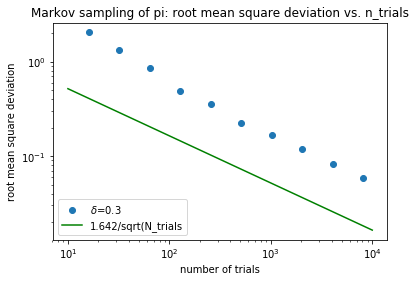

In [57]:

import random, math, pylab
 
def markov_pi(N, delta):
    x, y = 1.0, 1.0 #start from the cubehouse
    n_hits = 0
    n_accepts=0
    for i in range(N):
        del_x, del_y = random.uniform(-delta, delta), random.uniform(-delta, delta)
        if abs(x + del_x) < 1.0 and abs(y + del_y) < 1.0:
            x, y = x + del_x, y + del_y
            n_accepts +=1
        if x**2 + y**2 < 1.0: n_hits += 1
    return (n_accepts,n_hits)

delta=0.3
n_runs = 500
n_trials_list = []
sigmasqs = []

for poweroftwo in range(4, 14):

    n_trials = 2 ** poweroftwo
    sigmasq = 0.0

    for run in range(n_runs):     
        (n_accepts,n_hits)=markov_pi(n_trials,delta)
        pi_est = 4.0 * n_hits/ float(n_trials)
        sigmasq += (pi_est - math.pi) ** 2
    sigmasqs.append(math.sqrt(sigmasq/(n_runs)))
    n_trials_list.append(n_trials)

pylab.plot(n_trials_list, sigmasqs, 'o',label='$\delta$='+str(delta))

pylab.plot([10.0, 10000.0], [1.642 / math.sqrt(10.0), 1.642 / math.sqrt(10000.0)],'g-',label='1.642/sqrt(N_trials')
pylab.xscale('log')
pylab.yscale('log')
pylab.legend(loc='lower left')
pylab.xlabel('number of trials')
pylab.ylabel('root mean square deviation')
pylab.title('Markov sampling of pi: root mean square deviation vs. n_trials')
#pylab.savefig('direct_sampling_rms_deviation.png')
pylab.show()


100%|██████████| 7/7 [01:11<00:00,  9.96s/it]


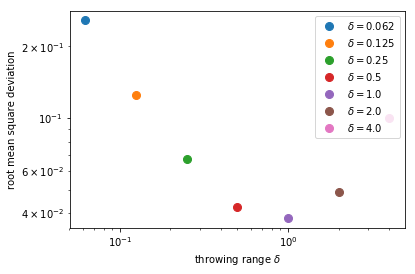

In [59]:
n_runs = 500
sigmas_list=[]
for delta in tqdm([0.062, 0.125, 0.25, 0.5, 1.0, 2.0, 4.0]):
    #n_trials_list = []
    sigmas = []
   # for poweroftwo in range(4, 13):
    n_trials = 2 ** 13
    sigma = 0.0
    
    for run in range(n_runs):
        (n_accepts,n_hits)=markov_pi(n_trials,delta)

        pi_est = 4.0 *n_hits / float(n_trials)
        sigma += (pi_est - math.pi) ** 2
    sigmas=(math.sqrt(sigma/(n_runs)))#p57  rms-deviation: sigma list (n_runs sampling)
    #n_trials_list.append(n_trials)
    sigmas_list.append(sigmas)
    pylab.plot(delta, sigmas, 'o', ms = 8, label = '$\delta = $' + str(delta))

pylab.xscale('log')
pylab.yscale('log')
pylab.xlabel('throwing range $\delta$')
pylab.ylabel('root mean square deviation')
pylab.legend(loc='upper right')
#pylab.plot([0.062, 0.125, 0.25, 0.5, 1.0, 2.0, 4.0],[, label = '')
#pylab.title('Markov-chain sampling of pi: root mean square deviation vs. n_trials')

#pylab.savefig('markov_sampling_rms_deviation.png')
#pylab.show()

100%|██████████| 7/7 [01:13<00:00,  9.96s/it]


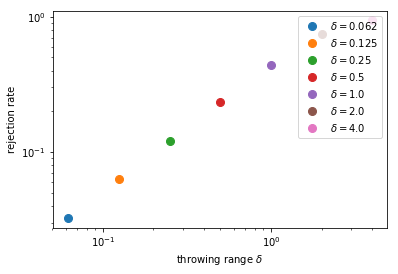

In [61]:
n_runs = 500
#n_list = []
delta_list=[0.062, 0.125, 0.25, 0.5, 1.0, 2.0, 4.0]
#rejects_rate=[]
for delta in tqdm(delta_list):
    #n_trials_list = []
    sigmas = []
   # for poweroftwo in range(4, 13):
    n_trials = 2 ** 13
    sigma = 0.0
    rejects=0.0
    for run in range(n_runs):
        (n_accepts,n_hits)=markov_pi(n_trials,delta)
        rejects  +=(n_trials-n_accepts)/n_trials
    rejects_rate=(rejects/float(n_runs))     
    pylab.plot(delta, rejects_rate, 'o', ms = 8, label = '$\delta = $' + str(delta))
   
            # n_list.append(n_accepts/n_trials)
pylab.xscale('log')
pylab.yscale('log')
pylab.xlabel('throwing range $\delta$')
pylab.ylabel('rejection rate')
pylab.legend(loc='upper right')    
#    temp_list.append([i/ float(n_trials) for i in n_list])

#dct={k:v for k,v in zip(delta_list,temp_list)}
#sorted(dct.items(), key=lambda x: x[0])

#print("delta | acceptance rate")

#for k,v in sorted(dct.items()):
  #  print(str(k)+"   | {:.3f}".format(v))

In [63]:
pd.DataFrame(sigmas_list,index=delta_list)

0
0.062  0.257100
0.125  0.124845
0.250  0.067761
0.500  0.042600
1.000  0.038230
2.000  0.049153
4.000  0.100627